In [1]:

!pip install librosa

In [31]:

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

참고 https://sanghyu.tistory.com/37

In [30]:
file = './data/3.항공기_3165_1.wav'

# sig, sr= samplerate
sig, sr = librosa.load(file,sr=44100)
print(type(sig),sig[:5], sig.shape)
print(sr)

<class 'numpy.ndarray'> [0.01055908 0.01004028 0.00997925 0.00973511 0.00946045] (972846,)
44100


/tmp/ipykernel_137886/3725947680.py:2: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sig, sr, alpha=0.5)


Text(0.5, 1.0, 'Waveform')

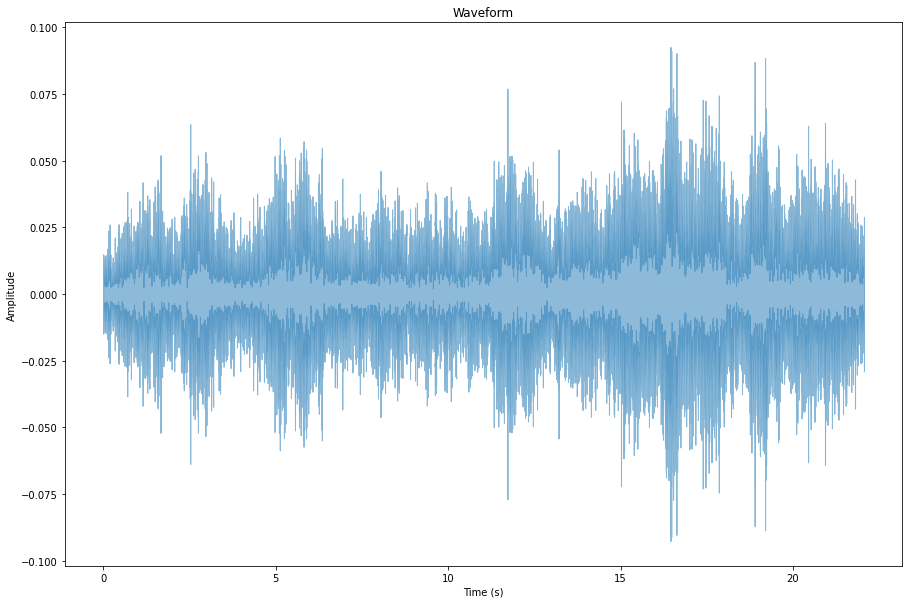

In [15]:
plt.figure(figsize=(15,10))
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

(1025, 1901)


Text(0.5, 1.0, 'Spectrogram (dB)')

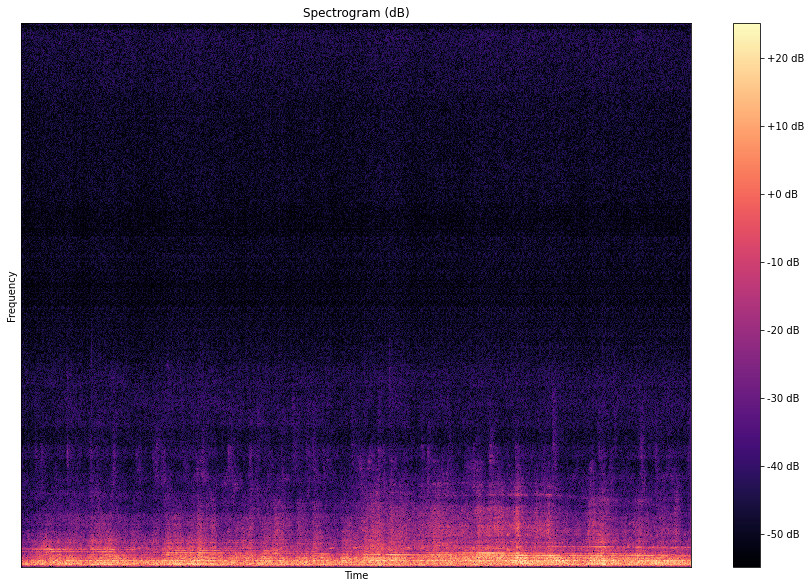

In [26]:
# STFT
hop_length = 512 # 전체 frame 수
n_fft = 2048 # frame 하나당 sample 수

# 초당 frame수, 초당 sample수
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)
print(stft.shape)
# 복소공간 값 절대값 취하기
magnitude = np.abs(stft)

# magnitude --> decibel
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize = (15,10))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram (dB)')

In [23]:
print(type(log_spectrogram), log_spectrogram.shape)
print(n_fft_duration)

<class 'numpy.ndarray'> (1025, 1901)
0.046439909297052155


inverse stft

In [25]:
inverse = librosa.istft(stft,hop_length=hop_length,n_fft=n_fft)
print(inverse.shape)

(972800,)


wav 파일 생성

In [34]:
import soundfile as sf 
sf.write('./data/test.wav',inverse,sr)
#librosa.output.write 는 이전 버전에서만 잇었음